In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("entries_processed_sentimen_df.csv")

In [24]:
df["Sentiment_Label"] = df["sentiment"].apply(lambda x: x.split("'")[3])
df["Sentiment_Score"] = df["sentiment"].apply(lambda x: x.split("'")[6].lstrip(": ").rstrip("}")).astype(float)

In [25]:
# Tüm datadaki negative vs positive dağılımı
sentiment_counts = pd.DataFrame(df["Sentiment_Label"].value_counts()).rename({"Sentiment_Label": "count"}, axis=1)
sentiment_counts["percentage"] = sentiment_counts["count"] / sentiment_counts["count"].sum() * 100
sentiment_counts

,count,percentage
negative,12747,71.343818
positive,5120,28.656182


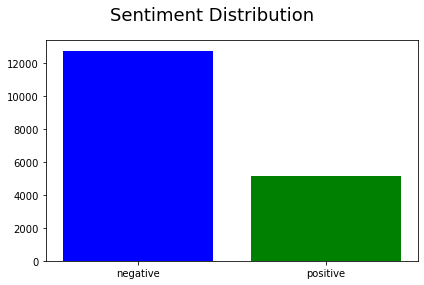

In [84]:
# Create bars
plt.bar(sentiment_counts.index, sentiment_counts["count"],color=["b","g"])
plt.xticks(rotation=360)
plt.yticks(rotation=360)
plt.suptitle("Sentiment Distribution", fontsize = 18)
plt.tight_layout()
plt.savefig('st.png',dpi=500)


# Show graphic
plt.show()

In [27]:
df["date"] = df["Entry_Date"].apply(lambda x: '/'.join(x[:7].split("-")))

In [28]:
# Eğer label negative ise sentiment_score'u -1 ile çarp
for i in range(len(df)):
    if df.loc[i, "Sentiment_Label"] == "negative":
        df.loc[i, "Sentiment_Score"] = -1 * df.loc[i, "Sentiment_Score"]

In [29]:
monthly_sent_score = pd.DataFrame(df.groupby("date")["Sentiment_Score"].mean()).reset_index().rename({"Sentiment_Score": "mean_sentiment"}, axis=1)
monthly_sent_score = pd.merge(monthly_sent_score, pd.DataFrame(df["date"].value_counts()).reset_index().rename({"index": "date", "date":"entry_count"}, axis=1))[["date", "entry_count", "mean_sentiment"]]
monthly_sent_score

,date,entry_count,mean_sentiment
0,1999/03,2,-0.154112
1,1999/06,1,-0.992911
2,1999/08,4,-0.439030
3,2000/01,2,0.906101
4,2000/04,2,0.931769
...,...,...,...
269,2022/08,58,-0.135231
270,2022/09,38,-0.500158
271,2022/10,22,-0.627587
272,2022/11,123,-0.725671


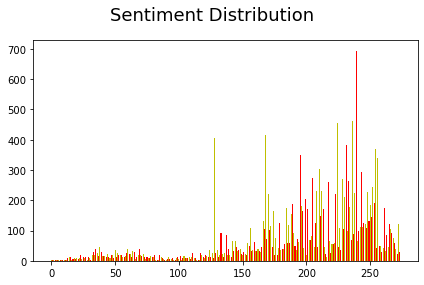

In [82]:
# Create bars
plt.bar(monthly_sent_score.index, monthly_sent_score["entry_count"],color=["y","r"])
plt.xticks(rotation=360)
plt.yticks(rotation=360)
plt.suptitle("Sentiment Distribution", fontsize = 18)
plt.tight_layout()
plt.savefig('barplot.png',dpi=500)


# Show graphic
plt.show()

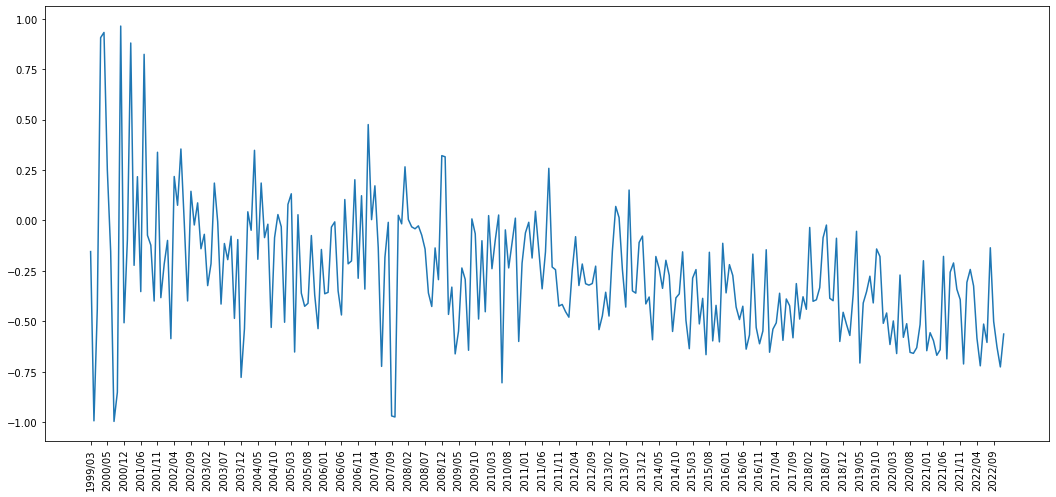

In [30]:
# Sentiment Score'un aylık ortalamasının değişimi
plt.figure(figsize=(18, 8))

plt.plot(monthly_sent_score["date"], monthly_sent_score["mean_sentiment"])
plt.xticks(monthly_sent_score["date"][::5], rotation=90)
plt.show()

## Entry Counts by Monthly - Peak 5 Topics 

In [3]:
df.groupby(["New_Topic","Entry_Date"])["Entry"].count()

New_Topic                           Entry_Date         
1 nisan 2021 kadıköy polis şiddeti  2021-01-04 19:12:00    1
                                    2021-01-04 19:18:00    2
                                    2021-01-04 19:24:00    2
                                    2021-01-04 19:28:00    1
                                    2021-01-04 19:29:00    1
                                                          ..
şanlı erenköy direnişi              2019-05-01 01:12:00    1
                                    2019-08-24 19:07:00    1
                                    2020-05-25 13:43:00    1
                                    2020-09-08 14:04:00    1
                                    2022-07-01 13:46:00    1
Name: Entry, Length: 15504, dtype: int64

In [4]:
df["Entry_Date"] = pd.to_datetime(df["Entry_Date"])

In [5]:
df["Entry_Date"].dt.date

0        2002-02-21
1        2003-11-01
2        2003-01-02
3        2003-03-21
4        2004-03-08
            ...    
17862    2022-02-07
17863    2022-02-07
17864    2022-02-07
17865    2022-03-07
17866    2022-03-07
Name: Entry_Date, Length: 17867, dtype: object

In [6]:
pd.DataFrame(df.groupby(["Entry_Date"])["Entry"].count()).reset_index()

,Entry_Date,Entry
0,1999-03-28 00:00:00,1
1,1999-03-29 00:00:00,1
2,1999-06-27 00:00:00,1
3,1999-08-07 00:00:00,3
4,1999-08-10 00:00:00,1
...,...,...
15412,2022-12-08 19:16:00,1
15413,2022-12-08 22:38:00,1
15414,2022-12-09 12:51:00,1
15415,2022-12-09 13:09:00,1


In [7]:
df["date"]=df["Entry_Date"].dt.date

In [8]:
import datetime
df["Entry_Date"] = df["date"].transform(lambda x: datetime.datetime.strftime(x, "%Y-%m"))

In [9]:
df.groupby(["Entry_Date"])["Entry"].count()

Entry_Date
1999-03      2
1999-06      1
1999-08      4
2000-01      2
2000-04      2
          ... 
2022-08     58
2022-09     38
2022-10     22
2022-11    123
2022-12     29
Name: Entry, Length: 274, dtype: int64

In [10]:
pd.DataFrame(df.groupby(["Entry_Date"])["Entry"].count()).reset_index()

,Entry_Date,Entry
0,1999-03,2
1,1999-06,1
2,1999-08,4
3,2000-01,2
4,2000-04,2
...,...,...
269,2022-08,58
270,2022-09,38
271,2022-10,22
272,2022-11,123


In [11]:
mountlyentry_counts = pd.DataFrame(df.groupby(["Entry_Date"])["Entry"].count()).reset_index()
mountlyentry_counts = mountlyentry_counts[mountlyentry_counts["Entry_Date"] >= "2014-01"]

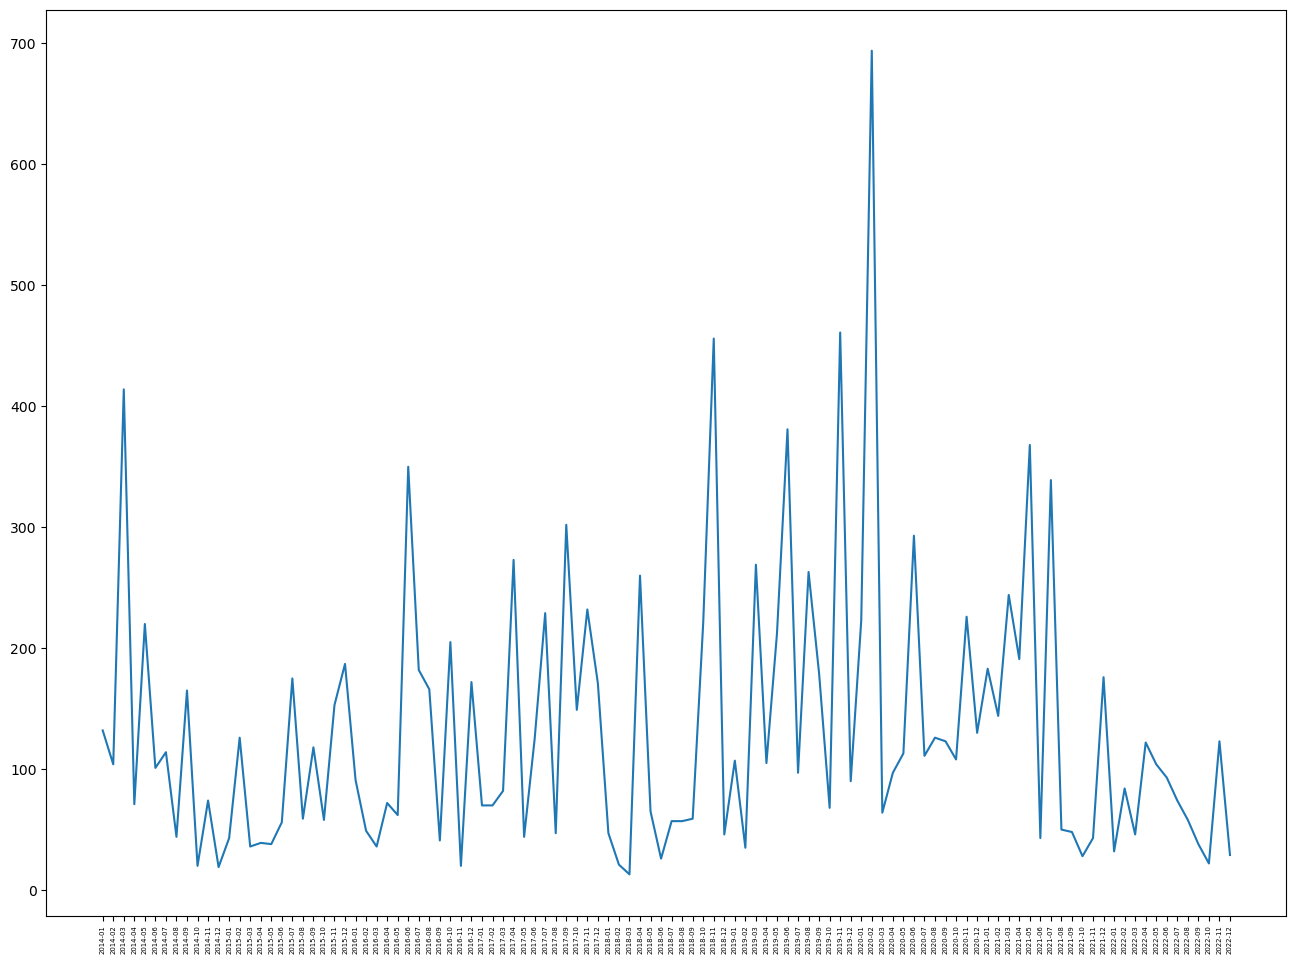

In [12]:
plt.figure(figsize=(16, 12),dpi=100)
plt.plot(mountlyentry_counts["Entry_Date"], mountlyentry_counts["Entry"])
# plt.xlim(left=pd.to_datetime("2014-01", format="%Y-%m"),right=pd.to_datetime("2023-01", format="%Y-%m"))
# plt.xlim("2014-01")
plt.xticks(rotation=90, fontsize=5)
plt.savefig("mountlyPDF.jpeg", format="jpeg", bbox_inches="tight")
plt.show()

In [13]:
mountlyentry_counts.sort_values("Entry", ascending=False).head(5)

,Entry_Date,Entry
239,2020-02,694
236,2019-11,461
224,2018-11,456
168,2014-03,414
231,2019-06,381


In [17]:
Monthly = df[df["Entry_Date"] == "2016-06"]
Monthly

,Entry,Author,Date,Old_Topic,New_Topic,Edited,Entry_Date,Edit_Date,Processed_Entry,Stemmed_Entry,sentiment,Entry_Length,date
201,(bkz: kadıköy'deki kentsel dönüşüm rezaleti),ikitam1bolu2,16.06.2016 11:02,kadıköy belediyesi,kadıköy belediyesi,False,2016-06,NaN,kadıköy deki kentsel dönüşüm rezaleti,kadıköy dek kentsel dönüş rezale,"{'label': 'negative', 'score': 0.9988313317298...",37,2016-06-16
1559,(bkz: kadıköy'deki kentsel dönüşüm eziyeti),ikitam1bolu2,16.06.2016 10:42,kadıköy'deki kentsel dönüşüm rezaleti,kadıköy'deki kentsel dönüşüm rezaleti,False,2016-06,NaN,kadıköy deki kentsel dönüşüm eziyeti,kadıköy dek kentsel dönüş ezi,"{'label': 'negative', 'score': 0.9984261989593...",36,2016-06-16
1560,(bkz: kadıköy'de yaşayanların hayatının tehlik...,ikitam1bolu2,16.06.2016 10:57,kadıköy'deki kentsel dönüşüm rezaleti,kadıköy'deki kentsel dönüşüm rezaleti,False,2016-06,NaN,kadıköy yaşayanların hayatının tehlikede,kadıköy yaşayan hayat tehlike,"{'label': 'negative', 'score': 0.6232879757881...",40,2016-06-16
1561,delik deşik ilçe.,next generation,16.06.2016 11:11,kadıköy'deki kentsel dönüşüm rezaleti,kadıköy'deki kentsel dönüşüm rezaleti,False,2016-06,NaN,delik deşik ilçe,delik deşik ilç,"{'label': 'negative', 'score': 0.9974572062492...",16,2016-06-16
1562,laz muteahhitlerin tekelindedir. yakin zamanda...,molekulernesne,16.06.2016 11:16 ~ 11:18,kadıköy'deki kentsel dönüşüm rezaleti,kadıköy'deki kentsel dönüşüm rezaleti,True,2016-06,2022-09-19 11:18:00,laz muteahhitlerin tekelindedir yakin zamanda ...,laz muteahhit tekel yaki begendig daire gidip ...,"{'label': 'negative', 'score': 0.9992290735244...",464,2016-06-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17134,"bitmiyor amk bitmiyor, öyle bir eziyet. sabah ...",macaroon,16.06.2016 11:32,kadıköy'deki kentsel dönüşüm eziyeti,kadıköy'deki kentsel dönüşüm eziyeti,False,2016-06,NaN,bitmiyor bitmiyor eziyet sabah makina sesi tak...,bitmiyor bitmiyor eziyet sabah makina ses tak ...,"{'label': 'negative', 'score': 0.9926935434341...",319,2016-06-16
17135,hiç bitmeyecek gibi duran eziyettir.\n\nkadıkö...,dogville,16.06.2016 11:35,kadıköy'deki kentsel dönüşüm eziyeti,kadıköy'deki kentsel dönüşüm eziyeti,False,2016-06,NaN,bitmeyecek duran eziyettir kadıköy köstebek yu...,bitmeyecek duran eziyet kadıköy köstebek yuva,"{'label': 'negative', 'score': 0.9802440404891...",50,2016-06-16
17136,nihayet benden başkalarının da ilgisini çektiğ...,optional hero,16.06.2016 19:46,kadıköy'deki kentsel dönüşüm eziyeti,kadıköy'deki kentsel dönüşüm eziyeti,False,2016-06,NaN,nihayet başkalarının ilgisini çektiğini gördüğ...,nihayet ilgi çektik gördük rezalet li başlık a...,"{'label': 'negative', 'score': 0.9993870258331...",396,2016-06-16
17732,"gönlümün efendisi,gözümün nuru,ömrümün şahidi ...",ortak parantez,14.06.2016 16:27,kozyatağı,kozyatağı,False,2016-06,NaN,gönlümün efendisi gözümün nuru ömrümün şahidi ...,gönl efendi göz nur ömr şahi mahallem gider gi...,"{'label': 'positive', 'score': 0.9914475679397...",125,2016-06-14


In [18]:
Monthly["New_Topic"].unique()

array(['kadıköy belediyesi', "kadıköy'deki kentsel dönüşüm rezaleti",
       'kadıköy sokakları', "kadıköy'ü çekici yapan detaylar",
       "kadıköy'ün tarihe karışmış mekanları", 'kadıköy vs beşiktaş',
       'moda deniz kulübü', 'moda solcusu', 'moda sahnesi', 'moda sahili',
       'moda', 'caferağa spor salonu', 'kurbağalıdere',
       "kurbağalıdere'nin saldığı dayanılmaz koku", 'hasanpaşa',
       'bostancı', 'bostancı köprüsü', 'caddebostan caffe nero',
       "caddebostan'da perili köşke gizlice giren gençler",
       'caddebostan sahili', 'erenköy', 'suadiye',
       "kadıköy'deki kentsel dönüşüm eziyeti", 'kozyatağı'], dtype=object)

## Entry Counts by Daily - Peak 5 Topics 

In [21]:
dailyentry_counts = pd.DataFrame(df.groupby(["date"])["Entry"].count()).reset_index()

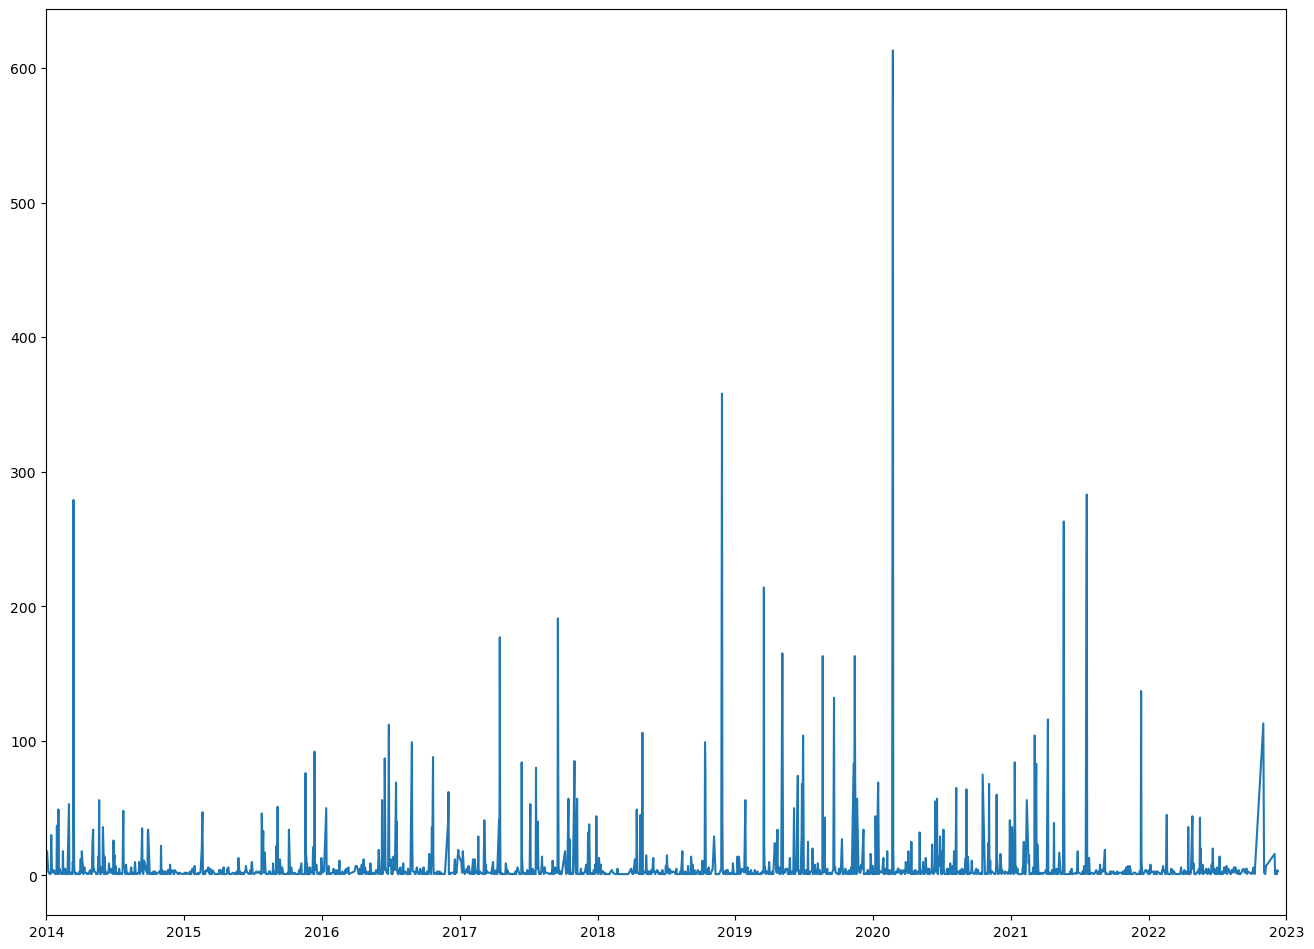

In [22]:
plt.figure(figsize=(16, 12),dpi=100)
plt.plot(dailyentry_counts["date"], dailyentry_counts["Entry"])
plt.xlim(left=pd.to_datetime("2014-01-01"),right=pd.to_datetime("2023-01-01"))
plt.show()

In [23]:
dailyentry_counts.sort_values("Entry", ascending=False).head(5)

,date,Entry
2749,2020-02-23,613
2456,2018-11-27,358
896,2010-11-28,348
3091,2021-07-21,283
1491,2014-03-14,279


In [25]:
#daily = df[df["Entry_Date"] == "2021-07-21"]
#daily

In [26]:
xdf["New_Topic"].unique()

array(['kadıköy belediyesi', "kadıköy'deki kentsel dönüşüm rezaleti",
       'kadıköy sokakları', "kadıköy'ü çekici yapan detaylar",
       "kadıköy'ün tarihe karışmış mekanları", 'kadıköy vs beşiktaş',
       'moda deniz kulübü', 'moda solcusu', 'moda sahnesi', 'moda sahili',
       'moda', 'caferağa spor salonu', 'kurbağalıdere',
       "kurbağalıdere'nin saldığı dayanılmaz koku", 'hasanpaşa',
       'bostancı', 'bostancı köprüsü', 'caddebostan caffe nero',
       "caddebostan'da perili köşke gizlice giren gençler",
       'caddebostan sahili', 'erenköy', 'suadiye',
       "kadıköy'deki kentsel dönüşüm eziyeti", 'kozyatağı'], dtype=object)

## Başlıkların ortalama sentiment oranı


In [31]:
mean_sent_score_by_topic = pd.DataFrame(df.groupby("New_Topic")["Sentiment_Score"].mean().sort_values()).reset_index().rename({"New_Topic":"topic", "Sentiment_Score":"mean_sentiment"}, axis=1)
mean_sent_score_by_topic = pd.merge(mean_sent_score_by_topic, pd.DataFrame(df["New_Topic"].value_counts()).reset_index().rename({"index":"topic", "New_Topic":"entry_count"}, axis=1))[["topic", "entry_count", "mean_sentiment"]]

In [41]:
mean_sent_score_by_topic = mean_sent_score_by_topic[mean_sent_score_by_topic["entry_count"] > 30].reset_index(drop=True)

In [85]:
# En negatif 20 başlık
mean_sent_score_by_topic.head(20)

,topic,entry_count,mean_sentiment
0,8 mayıs 2020 kadıköy belediyesi rezaleti,33,-0.953909
1,kadıköy belediyesi yüzünden boğularak ölen ked...,58,-0.891642
2,cafe küff,34,-0.870830
3,kadıköy'deki kentsel dönüşüm rezaleti,224,-0.853414
4,12 temmuz 2019 bp bostancı taciz olayı,58,-0.840957
5,3 eylül 2021 kadıköy gürültü protestoları,132,-0.829678
6,kadıköy'de pilavcıyı döven belediye zabıtaları,77,-0.811217
7,kadıköy moda tramvay hattı,78,-0.796911
8,27 eylül 2014 kadıköy'deki su kesintisi,64,-0.796161
9,8 eylül 2020 kadıköy starbucks sapığı,72,-0.790975


In [86]:
# En pozitif 20 başlık
mean_sent_score_by_topic.tail(20)

,topic,entry_count,mean_sentiment
105,müze gazhane,46,-0.095982
106,haydarpaşa garı'na yapılacak otele isim önerileri,55,-0.093559
107,bostancı,174,-0.089628
108,kadıköy vs taksim,218,-0.066661
109,21 ağustos 2019 marmaray suadiye durağı tuhaflığı,156,-0.060219
110,acıbadem caddesi,33,-0.058235
111,suadiye,85,-0.051017
112,moda sahnesi,111,-0.022724
113,yazarların kadıköy merakı,113,-0.021689
114,erenköy,94,-0.003951
